In [1]:
# Import Libraries
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib

In [2]:
df = pd.read_csv('Loan.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [8]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [9]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

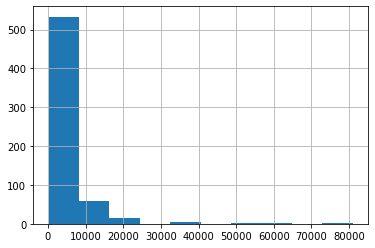

In [11]:
# Histogram of Applicant Income

df['ApplicantIncome'].hist()

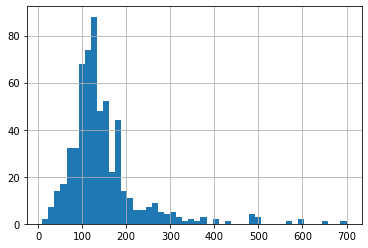

In [12]:
df['LoanAmount'].hist(bins=50)

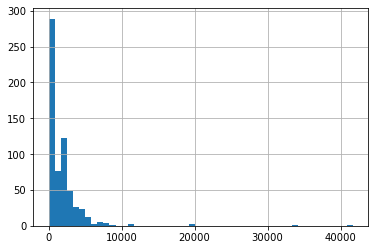

In [13]:
df['CoapplicantIncome'].hist(bins=50)

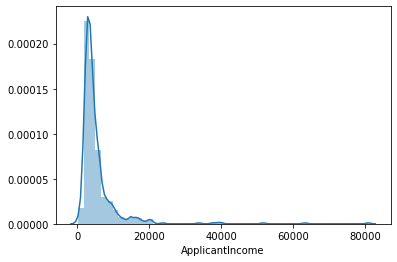

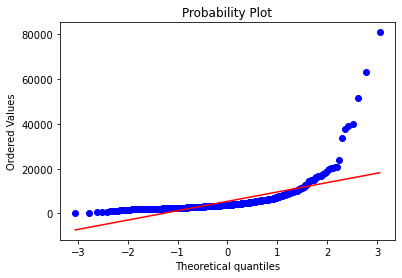

In [14]:
#histogram and normal probability plot
sb.distplot(df['ApplicantIncome'])
fig = plt.figure()
res = stats.probplot(df['ApplicantIncome'], plot=plt)

In [15]:
def categorical_column(col_name):
    f,ax = plt.subplots(1,2, figsize=(10,6))
     
    df[col_name].value_counts().plot.bar(cmap='Set2',ax=ax[0])
    ax[1].set_title(f' {col_name}')
    ax[1].set_ylabel('Count')
    ax[1].set_xlabel(f'{col_name}')
    
    
    sb.countplot(col_name, hue='Loan_Status',data=df, ax=ax[1], palette='Set2')
    ax[1].set_title(f'Loan Status by{col_name}')
    ax[1].set_xlabel(f'{col_name}')
    ax[1].set_ylabel('Count')

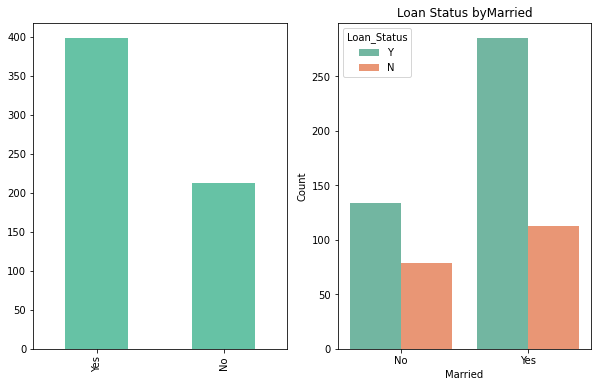

In [16]:
categorical_column('Married')

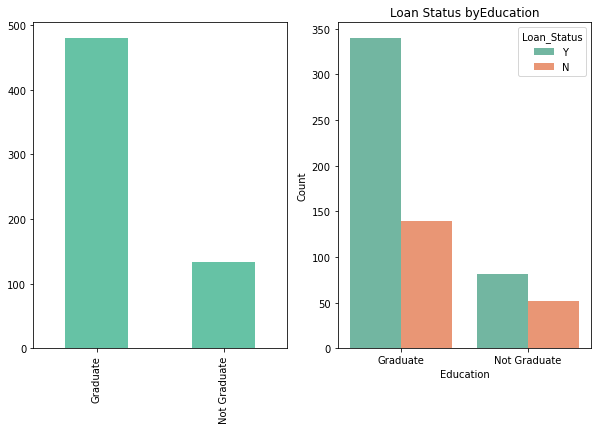

In [17]:
categorical_column('Education')

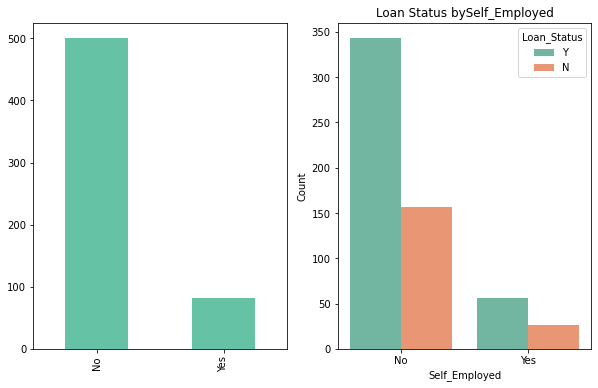

In [18]:
categorical_column('Self_Employed')

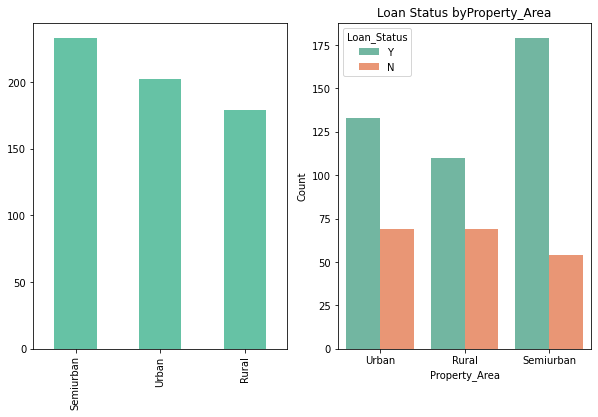

In [19]:
categorical_column('Property_Area')

In [20]:
# Now we will perform data types conversion where required
from sklearn.preprocessing import LabelEncoder

In [21]:
df['Loan_Status']=df['Loan_Status'].apply(lambda x : 1 if x=='Y' else 0)

In [22]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Data Processing
Machin Learning requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories. Before that we will fill all the missing values in the dataset.

In [23]:
# Impute missing values for Gender
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

# Impute missing values for Married
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

# Impute missing values for Dependents
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

# Impute missing values for Credit_History
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

# Convert all non-numeric values to number
col=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']

for i in col:
    le = LabelEncoder()
    df[i]=le.fit_transform(df[i].astype('str'))
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int32
Property_Area          int32
Loan_Status            int64
dtype: object

In [24]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [25]:
df['Loan_Amount_Term'].fillna(df['LoanAmount'].mean(), inplace=True)

In [26]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

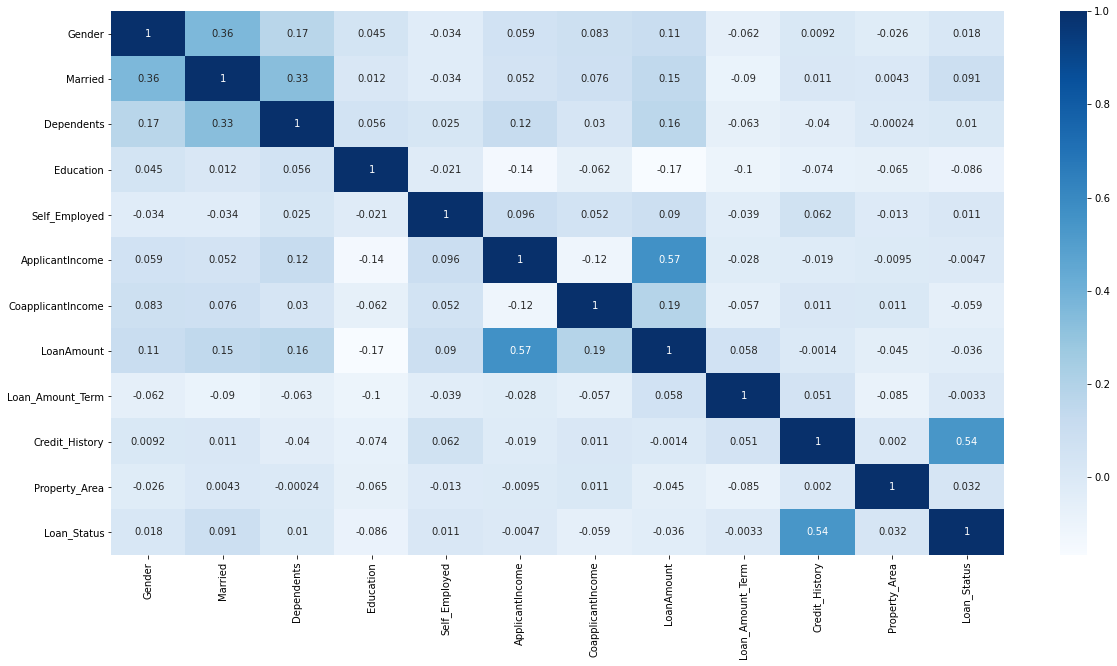

In [27]:
#Check correlation
fig=plt.figure(figsize=(20,10))
hc=df.corr(method='pearson')
sb.heatmap(hc,annot=True,cmap="Blues")

We will drop loan ID column because it is just id

In [28]:
# We will drop the unnecessary columns
df.drop(['Loan_ID'], axis=1,inplace=True)

In [29]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1


C:\Users\AmeyP\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\AmeyP\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\AmeyP\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\AmeyP\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\AmeyP\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


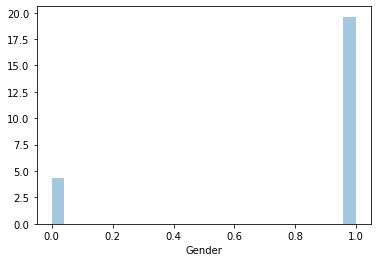

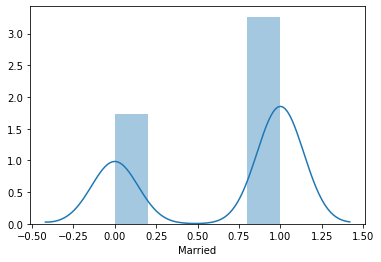

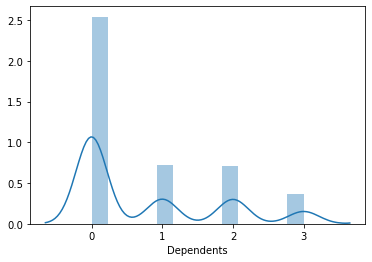

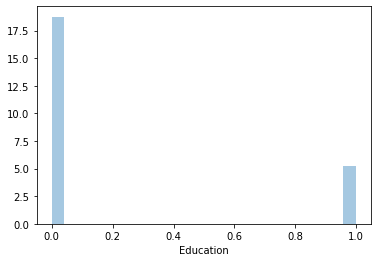

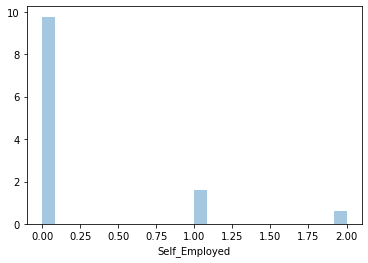

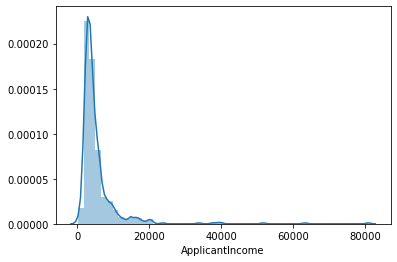

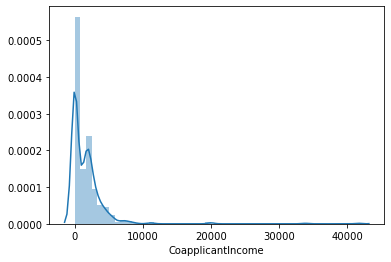

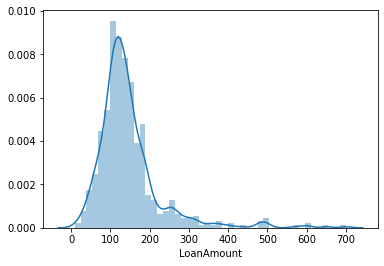

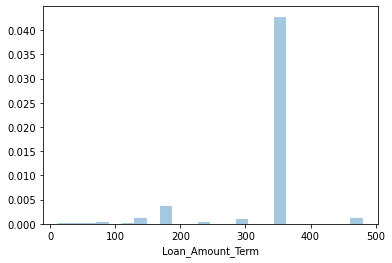

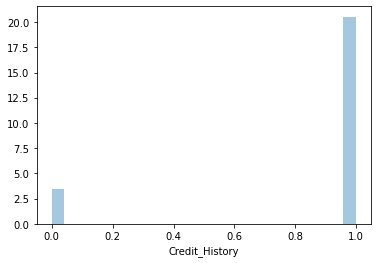

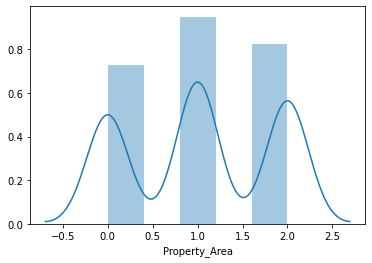

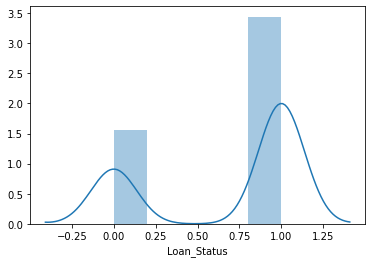

In [30]:
for i in df.columns:
    plt.figure()
    sb.distplot(df[i])

In [31]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.191118
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.099403
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Categorical column does not have outliers and skewness 

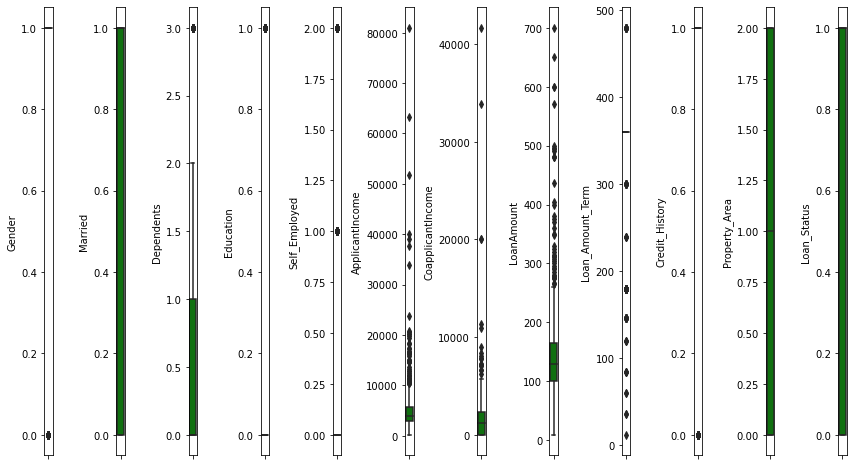

In [32]:
collist = df.columns
ncol = 30
nrows = 14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sb.boxplot(df[collist[i]],color = 'green',orient='v')
    plt.tight_layout()

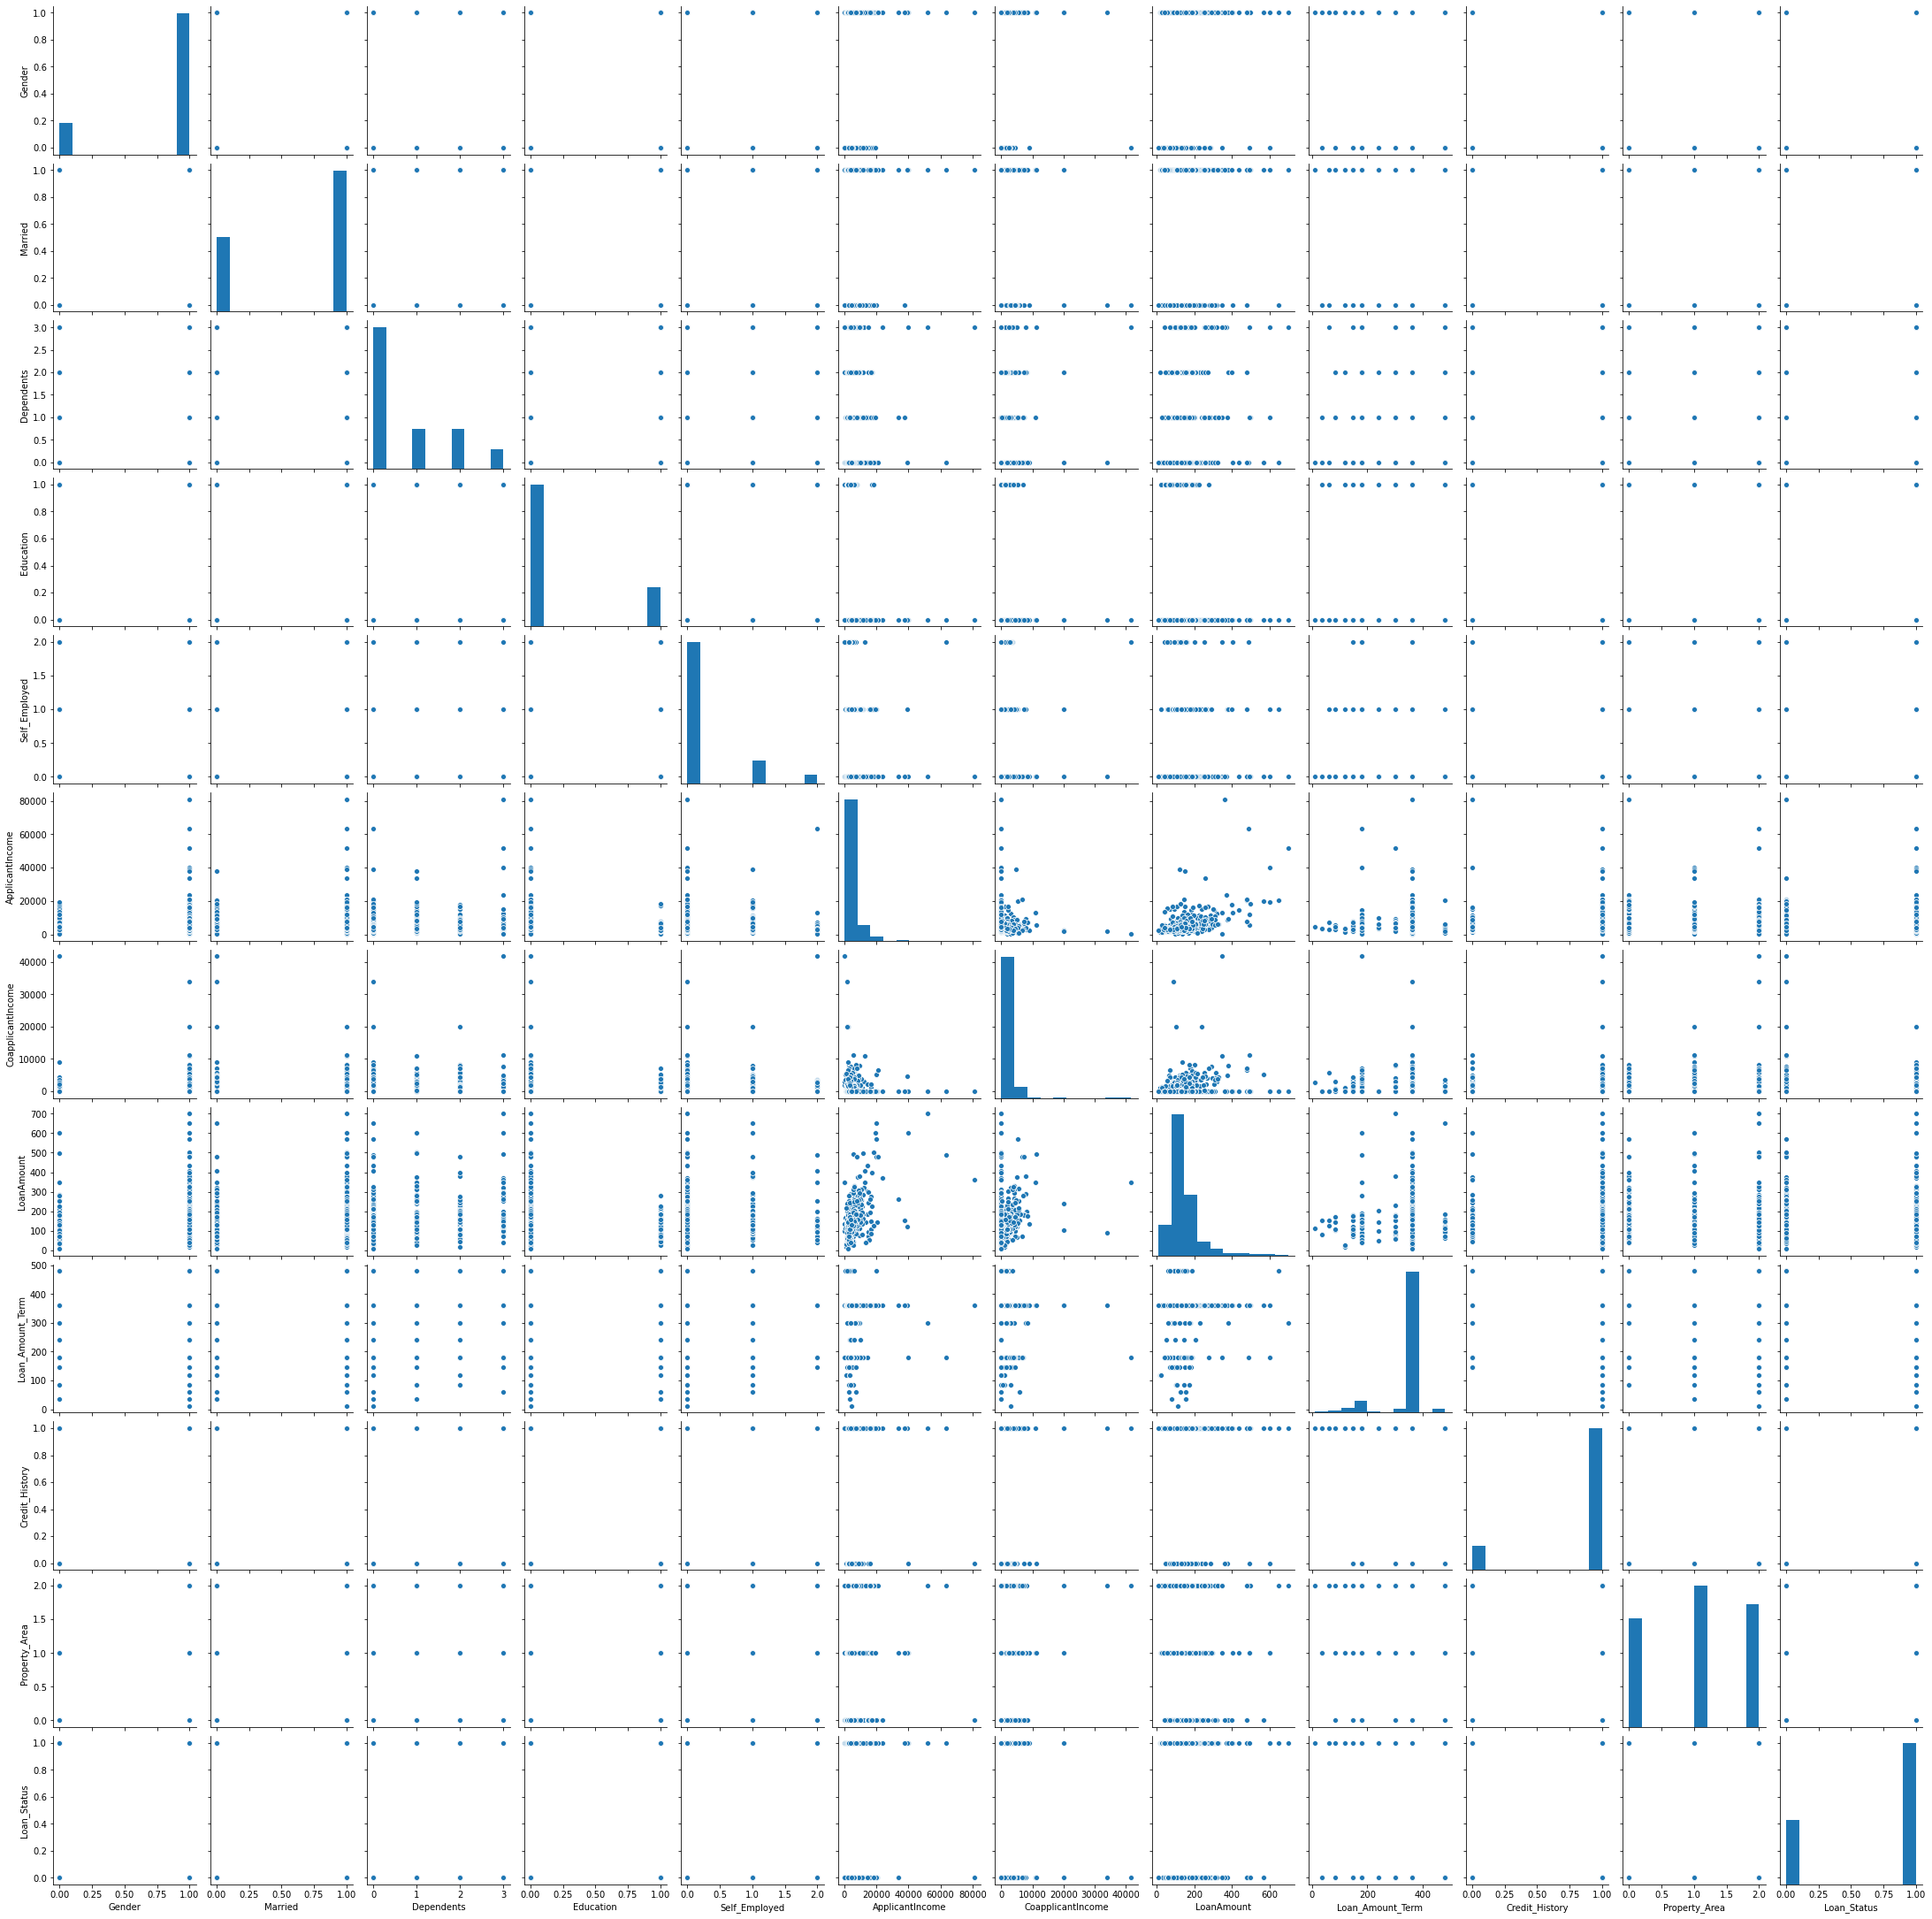

In [33]:
sb.pairplot(df)

In [34]:
df_x=df.drop(columns=['Loan_Status'])
y=df[['Loan_Status']]

In [35]:
df_x.shape

(614, 11)

In [36]:
y.shape

(614, 1)

In [37]:
y.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
maxAccu=0
maxRS=0
for i in range (1,1000):
    df_x_train,df_x_test,y_train,y_test=train_test_split(df_x,y,test_size=.22,random_state=i)
    LR=LogisticRegression()
    LR.fit(df_x_train,y_train)
    predlr=LR.predict(df_x_test)
    accu=accuracy_score(y_test,predlr)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
    
print("Best Accu is:",maxAccu,"on RS:",maxRS)

Best Accu is: 0.8897058823529411 on RS: 955


In [46]:
 x_train,x_test,y_train,y_test=train_test_split(df_x,y,test_size=.22,random_state=955)

In [47]:
score=cross_val_score(LR,df_x,y,cv=5)
print(score)
print(score.mean())

[0.81300813 0.77235772 0.7804878  0.82926829 0.81147541]
0.8013194722111155


GAUSSIAN NB

In [48]:
gnb=GaussianNB()
gnb.fit(df_x_train,y_train)
predg=gnb.predict(df_x_test)
print('accuracy_score:',)
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

accuracy_score:
0.7426470588235294
[[ 3 29]
 [ 6 98]]
              precision    recall  f1-score   support

           0       0.33      0.09      0.15        32
           1       0.77      0.94      0.85       104

    accuracy                           0.74       136
   macro avg       0.55      0.52      0.50       136
weighted avg       0.67      0.74      0.68       136



In [52]:
score=cross_val_score(gnb,df_x,y,cv=5)
print(score)
print(score.mean())

[0.80487805 0.75609756 0.76422764 0.82926829 0.80327869]
0.7915500466480074


SUPPORT VECTOR 

In [49]:
sv=SVC()
sv.fit(df_x_train,y_train)
predv=sv.predict(df_x_test)
print('accuracy_score:',)
print(accuracy_score(y_test,predv))
print(confusion_matrix(y_test,predv))
print(classification_report(y_test,predv))

accuracy_score:
0.7647058823529411
[[  0  32]
 [  0 104]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.76      1.00      0.87       104

    accuracy                           0.76       136
   macro avg       0.38      0.50      0.43       136
weighted avg       0.58      0.76      0.66       136



In [53]:
score=cross_val_score(sv,df_x,y,cv=5)
print(score)
print(score.mean())

[0.69105691 0.69105691 0.68292683 0.68292683 0.68852459]
0.6872984139677463


RANDOM FOREST

In [59]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(df_x_train,y_train)
predr=rf.predict(df_x_test)
print('accuracy_score:',)
print(accuracy_score(y_test,predr))
print(confusion_matrix(y_test,predr))
print(classification_report(y_test,predr))

accuracy_score:
0.7132352941176471
[[ 2 30]
 [ 9 95]]
              precision    recall  f1-score   support

           0       0.18      0.06      0.09        32
           1       0.76      0.91      0.83       104

    accuracy                           0.71       136
   macro avg       0.47      0.49      0.46       136
weighted avg       0.62      0.71      0.66       136



In [60]:
score=cross_val_score(rf,df_x,y,cv=5)
print(score)
print(score.mean())

[0.7804878  0.7398374  0.78861789 0.81300813 0.80327869]
0.7850459816073571


ADA BOOST

In [70]:
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
preda=ad.predict(x_test)
print('accuracy_score:',)
print(accuracy_score(y_test,preda))
print(confusion_matrix(y_test,preda))
print(classification_report(y_test,preda))

accuracy_score:
0.8235294117647058
[[20 12]
 [12 92]]
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        32
           1       0.88      0.88      0.88       104

    accuracy                           0.82       136
   macro avg       0.75      0.75      0.75       136
weighted avg       0.82      0.82      0.82       136



In [71]:
score=cross_val_score(ad,df_x,y,cv=5)
print(score)
print(score.mean())

[0.74796748 0.7804878  0.7804878  0.79674797 0.78688525]
0.7785152605624417


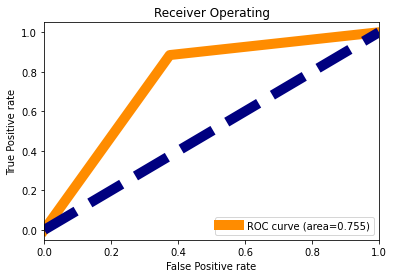

In [72]:
from sklearn.metrics import roc_curve,auc
fpr,trp,thresholds =  roc_curve(preda,y_test)
roc_auc = auc(fpr,trp)

plt.figure()
plt.plot(fpr,trp,color='darkorange',lw=10,label='ROC curve (area=%0.3f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.xlim([0.0,1.0])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating')
plt.legend(loc='lower right')
plt.show()

In [75]:
import pickle
filename = 'loan.pkl'
pickle.dump(sv,open(filename,'wb'))

In [76]:
loaded_model = pickle.load(open('loan.pkl','rb'))
result = loaded_model.score(df_x_test,y_test)
print(result)

0.7647058823529411
